# Proje 1: Görüntü Sınıflandırma (Model 3 - Geliştirilmiş CNN & Veri Artırma)

**Adı:** İbrahim
**Soyadı:** KARAKUZU
**Okul Numarası:** 2112721018
**GitHub Repo Bağlantısı:** [Linkiniz]

In [2]:
# Hem NumPy sürümünü 2.0'ın altına düşürelim
# Hem de Protobuf'ı TF 2.10 için en stabil olan 3.19.6 sürümüne sabitleyelim
%pip install "numpy<2.0" "protobuf==3.19.6"
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd # Tablo için gerekli
import os

# GPU Kontrolü
try:
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        print(f"✅ GPU Algılandı: {gpus[0].name}")
    else:
        print("⚠️ GPU Bulunamadı (CPU kullanılacak)")
except:
    pass

# Ayarlar
DATASET_PATH = 'dataset'
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 20  # Veri artırma olduğu için epoch sayısını artırdık (Daha zor öğrenir ama iyi öğrenir)

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl.metadata (61 kB)
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl.metadata (807 bytes)
Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)

  Attempting uninstall: protobuf

    Found existing installation: protobuf 3.20.3

    Uninstalling protobuf-3.20.3:

   ---------------------------------------- 0/2 [protobuf]
   ---------------------------------------- 0/2 [protobuf]
   ---------------------------------------- 0/2 [protobuf]
      Successfully uninstalled protobuf-3.20.3
   ---------------------------------------- 0/2 [protobuf]
   ---------------------------------------- 0/2 [protobuf]
   ---------------------------------------- 0/2 [protobuf]
   ---------------------------------------- 0/2 [protobuf]
   ---------------------------------------- 0/2 [protobuf]
   ---------------------------------------- 0/2 [protobuf]
   --------------------------------

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [2]:
# 1. Eğitim Seti için: VERİ ARTIRMA TEKNİKLERİ EKLENDİ
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,      # 15 derece döndürme
    width_shift_range=0.1,  # %10 yatay kaydırma
    height_shift_range=0.1, # %10 dikey kaydırma
    horizontal_flip=True,   # Yatay çevirme
    fill_mode='nearest',
    validation_split=0.2
)

# 2. Test Seti için: Sadece Rescale (Test verisi bozulmaz, orijinal kalmalı)
test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Generator'ları Oluşturma
train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = test_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

num_classes = len(train_generator.class_indices)

Found 178 images belonging to 2 classes.
Found 43 images belonging to 2 classes.


In [3]:
model = models.Sequential([
    # 1. Blok
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2), # Dropout Eklendi

    # 2. Blok
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    # 3. Blok
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3), # Dropout oranı artırıldı
    
    # 4. Blok (Yeni Eklendi - Daha Derin Model)
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Sınıflandırma
    layers.Flatten(),
    layers.Dense(256, activation='relu'), # Nöron sayısı artırıldı
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Learning Rate Değişimi (0.001 yerine 0.0005 yaptık - daha hassas öğrenmesi için)
model.compile(optimizer=optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\karakuzuibrahim\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,748,482 (10.48 MB)

 Trainable params: 2,748,482 (10.48 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
print("Model 3 (Augmented) Eğitimi Başlıyor...")
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)

Model 3 (Augmented) Eğitimi Başlıyor...
Epoch 1/20


c:\Users\karakuzuibrahim\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step - accuracy: 0.4589 - loss: 1.0038 - val_accuracy: 0.2188 - val_loss: 0.7154
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2812 - loss: 0.8207 - val_accuracy: 0.2188 - val_loss: 0.7004
Epoch 3/20
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.5000 - loss: 0.7268

c:\Users\karakuzuibrahim\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.5685 - loss: 0.6898 - val_accuracy: 0.7812 - val_loss: 0.6754
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7188 - loss: 0.6376 - val_accuracy: 0.7812 - val_loss: 0.6715
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.5753 - loss: 0.6663 - val_accuracy: 0.7812 - val_loss: 0.6512
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5625 - loss: 0.6619 - val_accuracy: 0.7812 - val_loss: 0.6478
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.5479 - loss: 0.6780 - val_accuracy: 0.7812 - val_loss: 0.6570
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6875 - loss: 0.6022 - val_accuracy: 0.7812 - val_loss: 0.6558
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.5616 - loss: 0.6511 - val_accuracy: 0.7812 - val_loss: 0.6473
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6250 - loss: 0.6196 - val_accuracy: 0.7812 - val_loss: 0.6375
Epoch 

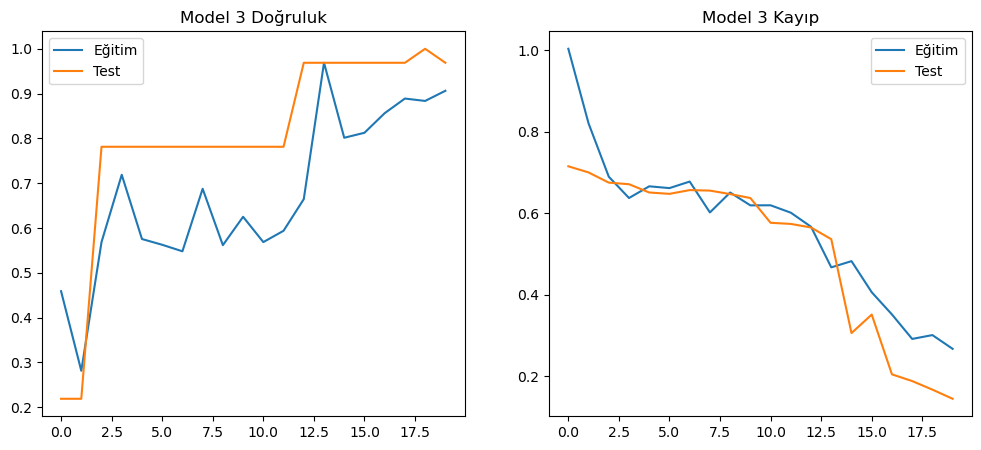

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9535 - loss: 0.2276
Model 3 Test Başarısı: %95.35

--- PERFORMANS KARŞILAŞTIRMA TABLOSU ---


,Deney No,Model,Veri Artırma,Filtre/Katman,Test Doğruluğu,Notlar
0,1,Model 1 (Transfer Learning),Hayır,VGG16 (Derin),%100.00,En iyi performans (Pre-trained)
1,2,Model 2 (Basit CNN),Hayır,32-64-128,%95.35,Temel Başarım
2,3,Model 3 (Augmented CNN),Evet,32-64-128-256 (Daha Derin),%95.35,Veri artırma ile genelleştirilmiş


In [8]:
# 1. Grafikler
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim')
plt.plot(epochs_range, val_acc, label='Test')
plt.title('Model 3 Doğruluk')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim')
plt.plot(epochs_range, val_loss, label='Test')
plt.title('Model 3 Kayıp')
plt.legend()
plt.show()

# 2. Final Test
loss, accuracy = model.evaluate(validation_generator)
m3_score = accuracy * 100
print(f"Model 3 Test Başarısı: %{m3_score:.2f}")

# 3. Karşılaştırma Tablosu (Ödevde İstenen Format)
# Buradaki Model 1 ve Model 2 skorlarını kendi aldığın notlara göre güncelleyebilirsin
data = {
    'Deney No': [1, 2, 3],
    'Model': ['Model 1 (Transfer Learning)', 'Model 2 (Basit CNN)', 'Model 3 (Augmented CNN)'],
    'Veri Artırma': ['Hayır', 'Hayır', 'Evet'],
    'Filtre/Katman': ['VGG16 (Derin)', '32-64-128', '32-64-128-256 (Daha Derin)'],
    'Test Doğruluğu': ['%100.00', '%95.35', f'%{m3_score:.2f}'], 
    'Notlar': ['En iyi performans (Pre-trained)', 'Temel Başarım', 'Veri artırma ile genelleştirilmiş']
}

df_results = pd.DataFrame(data)
print("\n--- PERFORMANS KARŞILAŞTIRMA TABLOSU ---")
display(df_results)